<a href="https://colab.research.google.com/github/Mrunmaigaikwad1/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('/content/submission.csv')
print(df.head())

       textID                                      selected_text
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh
1  96d74cb729                                           exciting
2  eee518ae67                                          Recession
3  01082688c6                                        happy bday!
4  33987a8ee5                                        I like it!!


In [5]:
print(df.columns)


Index(['textID', 'selected_text'], dtype='object')


In [6]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already done)
nltk.download('stopwords')

# Function to clean and preprocess tweet text
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply the preprocessing function to the 'text' column
df['clean_selected_text'] = df['selected_text'].apply(preprocess_text)

# Display the cleaned data
print(df[['selected_text', 'clean_selected_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                       selected_text clean_selected_text
0  Last session of the day  http://twitpic.com/67ezh    last session day
1                                           exciting            exciting
2                                          Recession           recession
3                                        happy bday!          happy bday
4                                        I like it!!                like


In [9]:
from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply the sentiment analysis function to the cleaned text
df['sentiment'] = df['clean_selected_text'].apply(get_sentiment)

# Display sentiment values
print(df[['clean_selected_text', 'sentiment']].head())


  clean_selected_text  sentiment
0    last session day        0.0
1            exciting        0.3
2           recession        0.0
3          happy bday        0.8
4                like        0.0


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score using VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # Compound score: -1 (negative), 0 (neutral), 1 (positive)

# Apply VADER sentiment analysis
df['sentiment_vader'] = df['clean_selected_text'].apply(get_vader_sentiment)

# Display sentiment values from VADER
print(df[['clean_selected_text', 'sentiment_vader']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  clean_selected_text  sentiment_vader
0    last session day           0.0000
1            exciting           0.4939
2           recession          -0.4215
3          happy bday           0.5719
4                like           0.3612


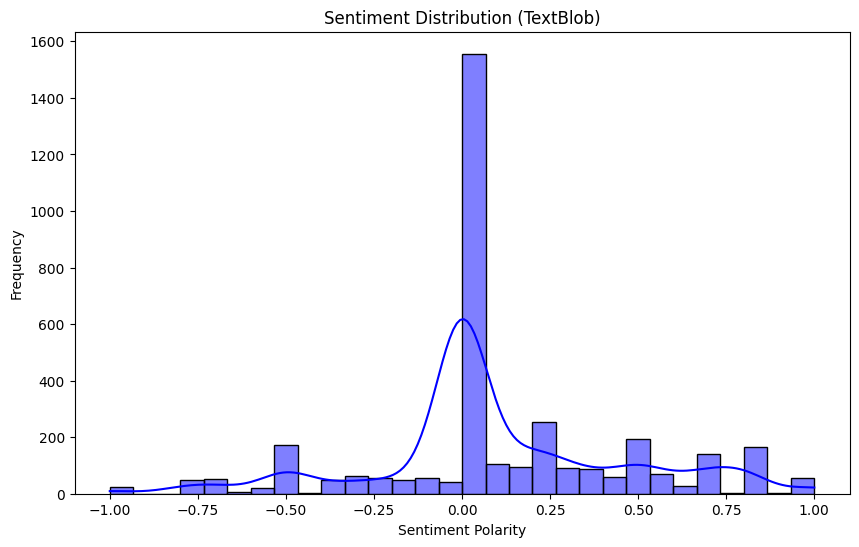

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment values
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='blue', bins=30)
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


<ipython-input-14-5b8820e26578>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='Set2')


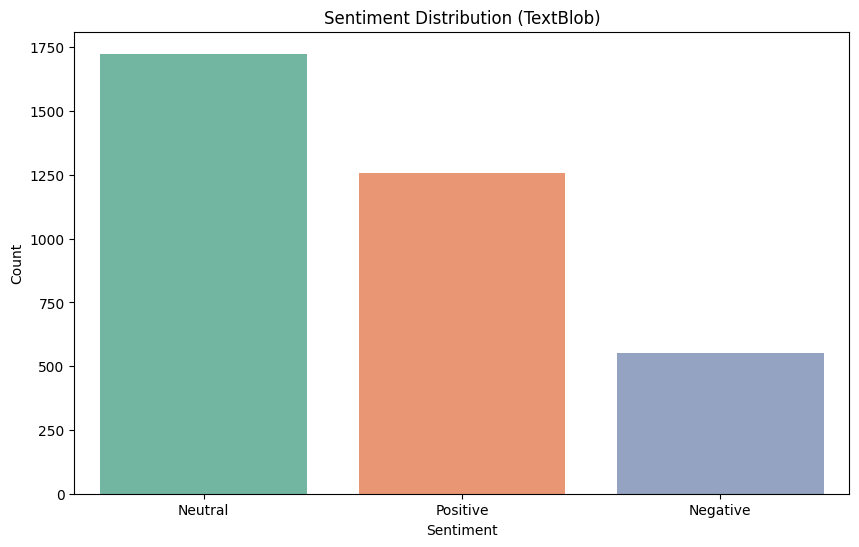

In [14]:
# Classify sentiment as positive, neutral, or negative
def sentiment_category(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(sentiment_category)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_label', palette='Set2')
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


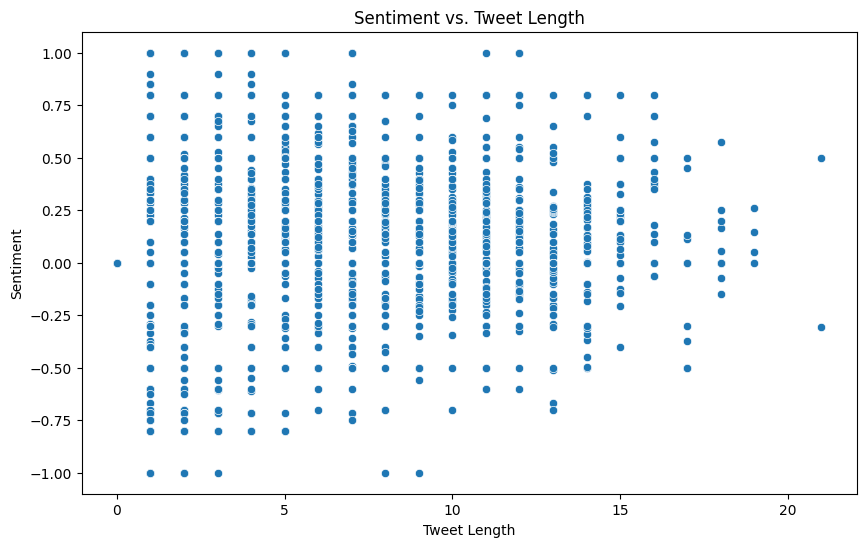

In [16]:
# Plot sentiment vs. tweet length
df['tweet_length'] = df['clean_selected_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tweet_length', y='sentiment')
plt.title('Sentiment vs. Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.show()
